In [18]:
from tools import get_input
import numpy as np

data, data_test = get_input(18)
len(data), len(data_test)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9501  100  9501    0     0  25656      0 --:--:-- --:--:-- --:--:-- 25609
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7037    0  7037    0     0  19344      0 --:--:-- --:--:-- --:--:-- 19385


(676, 14)

In [35]:
pos = (0, 0)
points = [pos]

for line in data:
    dir, n, c = line.split()
    n = int(n)
    if dir=='R':
        for i in range(1, n+1):
            pos = (pos[0], pos[1]+1)
            points.append(pos)
    elif dir=='L':
        for i in range(1, n+1):
            pos = (pos[0], pos[1]-1)
            points.append(pos)
    elif dir=='U':
        for i in range(1, n+1):
            pos = (pos[0]-1, pos[1])
            points.append(pos)
    elif dir=='D':
        for i in range(1, n+1):
            pos = (pos[0]+1, pos[1])
            points.append(pos)
print(len(set(points)))

S = 0
for i in set([p[0] for p in points]):
    ys = np.array(sorted([p[1] for p in points if p[0]==i]))
    d_next = np.zeros(ys.shape[0])
    d_prev = np.zeros(ys.shape[0])
    d_next[:-1] = ys[1:]-ys[:-1] # for elements 0 to N-2
    d_next[-1] = 2 # for element N-1
    d_prev[1:] = ys[1:]-ys[:-1] # for elements 1 to N-1
    d_prev[0] = 2 # for element 0
    print(i, sum(d_next==1), sum(d_prev==1))
    S += sum(d_next==1)
    ends = ys[d_next>1]
    starts = ys[d_prev>1]
    #print(i, sum(starts[1::2]-ends[::2]) + ends[::2].shape[0])
    S += sum(starts[1::2]-ends[::2]) + ends[::2].shape[0]
S


3590
0 30 30
1 0 0
2 8 8
3 8 8
4 10 10
5 0 0
6 13 13


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

(-20.0, 20.0)

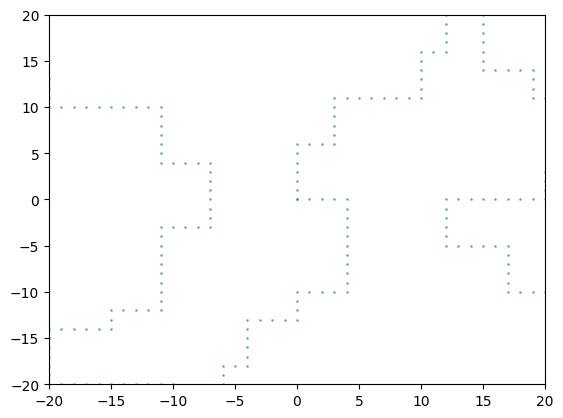

In [38]:
import matplotlib.pyplot as plt
plt.scatter([p[1] for p in points], [p[0] for p in points], s=1, alpha=0.5)
plt.ylim(-20, 20)
plt.xlim(-20, 20)

In [15]:
sorted([1, 3, 2])

[1, 2, 3]